<a href="https://colab.research.google.com/github/Parabucolica/ProgramacaoEstatistica/blob/main/labs/Prog_Estat_Lab0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício: Pandas, NumPy e Matplotlib

**Objetivo:**
1. Criar um dicionário que armazene diferentes distribuições e seus parâmetros  
2. Simular dados usando `numpy.random`  
3. Calcular estatísticas básicas  
4. Plotar histogramas com `Matplotlib`  
5. Organizar as estatísticas em um `DataFrame` do `Pandas`  
6. Estender o exercício com novas distribuições e estatísticas adicionais  
7. Comparar resultados originais e aproximados  

---

## Passo 1 – Criar o dicionário principal
As chaves devem ser nomes de distribuições: `"Normal"`, `"Exponencial"`, `"Uniforme"`  
Os valores devem ser dicionários contendo:  
- `"params"` → parâmetros da distribuição  
- `"dados"` → inicialmente `None`  
- `"estatisticas"` → inicialmente `None`  

Exemplo de estrutura:

    distribuicoes = {
        "Normal": {"params": {"loc": 0, "scale": 1}, "dados": None, "estatisticas": None},
        "Exponencial": {"params": {"scale": 2}, "dados": None, "estatisticas": None},
        "Uniforme": {"params": {"low": -1, "high": 1}, "dados": None, "estatisticas": None}
    }

---



In [ ]:
distribuicoes = {
    "Normal": {"params": {"loc": 0, "scale": 1}, "dados": None, "estatisticas": None},
    "Exponencial": {"params": {"scale": 2}, "dados": None, "estatisticas": None},
    "Uniforme": {"params": {"low": -1, "high": 1}, "dados": None, "estatisticas": None}
}

distribuicoes["Exponencial"]["params"]["scale"] = 1




## Passo 2 – Importar bibliotecas
Importe as bibliotecas:  
- `numpy` para simulação  
- `pandas` para organização dos resultados  
- `matplotlib` para visualização  

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Passo 3 – Gerar os dados
Para cada distribuição, gere uma amostra de tamanho **1000** usando `numpy.random` e salve em `"dados"`.  

---



In [ ]:
# é mais prático apenas colocar size=1000 como argumento
dados_Normal = [np.random.normal(loc= 0, scale = 1) for _ in range(1000)]
dados_Exponencial = [np.random.exponential(scale = 1) for _ in range(1000)]
dados_Uniforme = [np.random.uniform(low= -1, high = 1) for _ in range(1000)]


distribuicoes['Normal']['dados'] = dados_Normal
distribuicoes['Exponencial']['dados'] = dados_Exponencial
distribuicoes['Uniforme']['dados'] = dados_Uniforme



## Passo 4 – Calcular estatísticas básicas
Para cada distribuição, calcule:  
- Média  
- Mediana  
- Variância  
- Desvio padrão  
Armazene em um dicionário dentro da chave `"estatisticas"`.  

---



In [ ]:
def calculo_estatisticas(dados):
  return {'mean': float(np.mean(dados)), 'median': float(np.median(dados)), 'variance': float(np.var(dados)), 'std': float(np.std(dados))}


distribuicoes['Normal']['estatisticas'] = calculo_estatisticas(dados_Normal)
distribuicoes['Exponencial']['estatisticas'] = calculo_estatisticas(dados_Exponencial)
distribuicoes['Uniforme']['estatisticas'] = calculo_estatisticas(dados_Uniforme)


## Passo 5 – Visualizar os dados
Para cada distribuição, faça um **histograma** mostrando a forma da distribuição.  

---


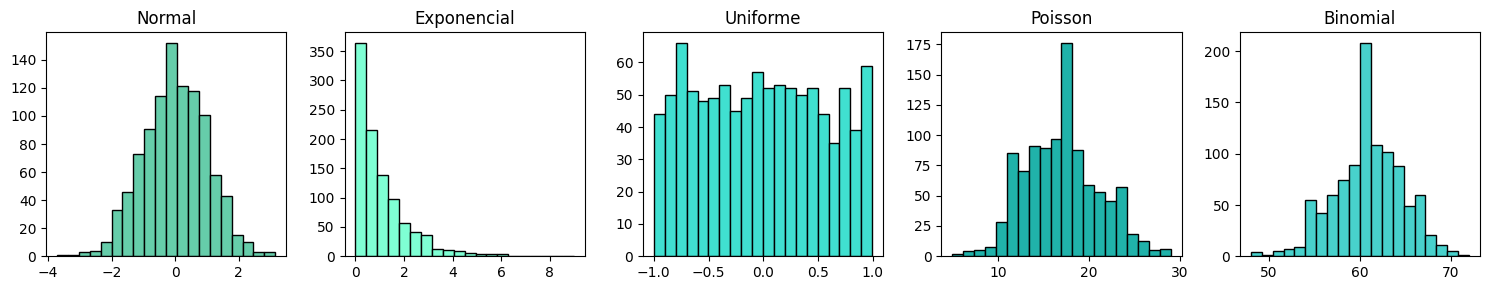

In [ ]:
# praticamente copiado da internet/ia generativa

fig, axes = plt.subplots(1, len(distribuicoes), figsize=(15, 3))

for ax, (key, dist), cor in zip(axes, distribuicoes.items(),['mediumaquamarine','aquamarine','turquoise','lightseagreen','mediumturquoise']):
    ax.hist(dist['dados'], bins=20, edgecolor="black", color=[cor])

    ax.set_title(key)

plt.tight_layout()
plt.show()


## Passo 6 – Organizar resultados em Pandas
Crie um `DataFrame` contendo as estatísticas de todas as distribuições.  

---


In [ ]:
dados = pd.DataFrame([distribuicoes[i]['estatisticas'] for i in distribuicoes.keys()], index = ['Normal','Exponential','Uniform'])

dados

,mean,median,variance,std
Normal,0.007748,-0.005538,0.994300,0.997146
Exponential,1.074043,0.716014,1.252100,1.118973
Uniform,-0.016785,-0.018746,0.329262,0.573813



## Passo 7 – Adicionar novas distribuições
- Inclua mais uma distribuição, como `"Poisson"` ou `"Binomial"`.  
- Gere dados usando `numpy.random`.  
- Calcule as estatísticas básicas e atualize o `DataFrame`.  

---



In [ ]:
dados_Poisson = [np.random.poisson(lam=17) for _ in range(1000)]
dados_Binomial = [np.random.binomial(n=78, p=0.78) for _ in range(1000)]

distribuicoes["Poisson"] = {"params": {"mean": 17},
                            "dados": dados_Poisson,
                            "estatisticas": calculo_estatisticas(dados_Poisson)}

distribuicoes["Binomial"] = {"params": {"n": 78, "p": 0.78},
                            "dados": dados_Binomial,
                            "estatisticas": calculo_estatisticas(dados_Binomial)}


## Passo 8 – Estatísticas adicionais
Para cada distribuição, calcule também:  
- Mínimo (`np.min`)  
- Máximo (`np.max`)  
- Quartis (`np.percentile`)  

Atualize o campo `"estatisticas"` e o `DataFrame` com essas novas colunas.  

---


In [ ]:
distribuicoes["Normal"]["estatisticas"]["min"] = float(np.min(dados_Normal))
distribuicoes["Normal"]["estatisticas"]["max"] = float(np.max(dados_Normal))
distribuicoes["Normal"]["estatisticas"]["quantiles"] = ([float(i) for i in np.percentile(dados_Normal,[25,50,75])])

distribuicoes["Exponencial"]["estatisticas"]["min"] = float(np.min(dados_Exponencial))
distribuicoes["Exponencial"]["estatisticas"]["max"] = float(np.max(dados_Exponencial))
distribuicoes["Exponencial"]["estatisticas"]["quantiles"] = ([float(i) for i in np.percentile(dados_Exponencial,[25,50,75])])

distribuicoes["Uniforme"]["estatisticas"]["min"] = float(np.min(dados_Exponencial))
distribuicoes["Uniforme"]["estatisticas"]["max"] = float(np.max(dados_Exponencial))
distribuicoes["Uniforme"]["estatisticas"]["quantiles"] = ([float(i) for i in np.percentile(dados_Exponencial,[25,50,75])])

distribuicoes["Poisson"]["estatisticas"]["min"] = float(np.min(dados_Poisson))
distribuicoes["Poisson"]["estatisticas"]["max"] = float(np.max(dados_Poisson))
distribuicoes["Poisson"]["estatisticas"]["quantiles"] = ([float(i) for i in np.percentile(dados_Poisson,[25,50,75])])

distribuicoes["Binomial"]["estatisticas"]["min"] = float(np.min(dados_Binomial))
distribuicoes["Binomial"]["estatisticas"]["max"] = float(np.max(dados_Binomial))
distribuicoes["Binomial"]["estatisticas"]["quantiles"] = ([float(i) for i in np.percentile(dados_Binomial,[25,50,75])])


In [ ]:
# brincadeira com iteração e acesso a dicionários

for key in distribuicoes.keys():
  for statistic,func in [('min',np.min), ('max', np.max), ('quantiles',np.percentile)]:
    distribuicoes[key]['estatisticas'][statistic] = func(distribuicoes[key]['dados'], [25,50,75]) if func is np.percentile else float(func(distribuicoes[key]['dados']))



In [ ]:
dados = pd.DataFrame([distribuicoes[i]['estatisticas'] for i in distribuicoes.keys()], index = ['Normal','Exponential','Uniform','Poisson','Binomial'])
dados

,mean,median,variance,std,min,max,quantiles
Normal,0.007748,-0.005538,0.994300,0.997146,-3.715523,3.153740,"[-0.6707333596084395, -0.005537608326747694, 0..."
Exponential,1.074043,0.716014,1.252100,1.118973,0.003953,8.984376,"[0.296581379054542, 0.71601410157346, 1.474350..."
Uniform,-0.016785,-0.018746,0.329262,0.573813,-0.999151,0.996142,"[-0.5186355151104817, -0.018746198817951365, 0..."
Poisson,16.968000,17.000000,16.794976,4.098167,5.000000,29.000000,"[14.0, 17.0, 20.0]"
Binomial,60.838000,61.000000,13.795756,3.714264,48.000000,72.000000,"[58.0, 61.0, 63.0]"



## Passo 9 – Comparar distribuições graficamente
Faça um **boxplot** com todas as distribuições no mesmo gráfico, com título e rótulos adequados.  

---



{'whiskers': [<matplotlib.lines.Line2D at 0x7c78b27fff80>,
 'caps': [<matplotlib.lines.Line2D at 0x7c78b27ff740>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c78b27ffcb0>,
 'medians': [<matplotlib.lines.Line2D at 0x7c78b2921c10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7c78b27fd3d0>,
 'means': []}

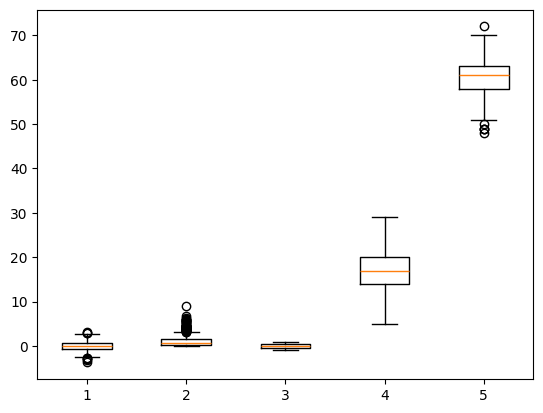

In [ ]:
plt.boxplot([dados_Normal, dados_Exponencial, dados_Uniforme, dados_Poisson, dados_Binomial])

## Passo 10 – Comparar estatísticas calculadas com valores teóricos
- Para cada distribuição, obtenha os valores teóricos (esperados) a partir dos parâmetros em `"params"`.  
- Compare esses valores com as estatísticas calculadas a partir da amostra.   
- Crie um gráfico de barras mostrando `media_teorica` e `media_amostra` para cada distribuição.  

In [ ]:
"""
valores esperados das distribuicoes utilizadas:
Normal : 0 (parametro de locacao)
Exponencial: 1 (1 / parametro de escala)
Uniforme: 0 ((a+b) / 2)
Poisson: 17 (parametro)
Binomial: 60.84 (np)
"""
teorico = [0,1,0,17,60.84]
empirico = [distribuicoes[key]['estatisticas']['mean'] for key in distribuicoes.keys()]
comparacao = {
    "Valor Teórico": teorico,
    "Valor Empírico": empirico,
    "Diferença": [teorico[i]-empirico[i] for i in range(len(empirico))]
}

df = pd.DataFrame(comparacao, index=['Normal','Exponencial','Uniforme','Poisson','Binomial'])
df

,Valor Teórico,Valor Empírico,Diferença
Normal,0.00,0.007748,-0.007748
Exponencial,1.00,1.074043,-0.074043
Uniforme,0.00,-0.016785,0.016785
Poisson,17.00,16.968000,0.032000
Binomial,60.84,60.838000,0.002000


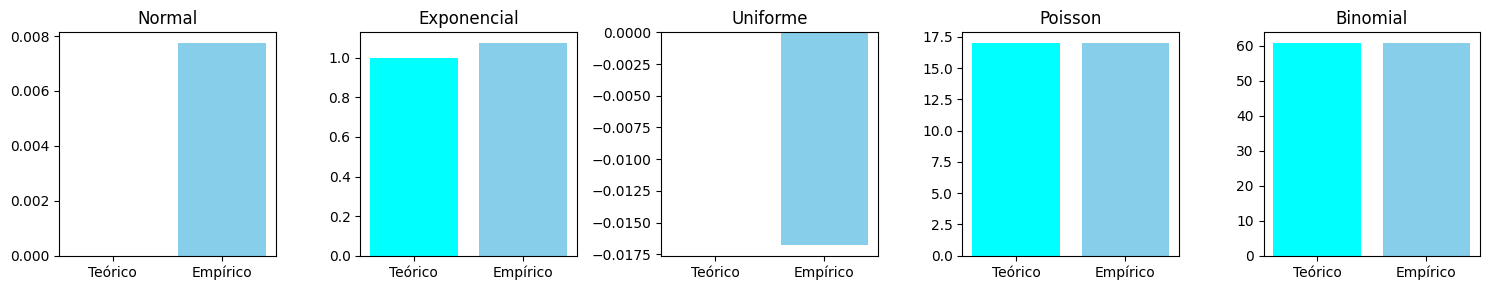

In [ ]:
# praticamente copiado da internet/ia generativa

fig, axes = plt.subplots(1, len(distribuicoes), figsize=(15, 3))

for ax, (key, t, e) in zip(axes, zip(distribuicoes.keys(), teorico, empirico)):
    ax.bar(["Teórico","Empírico"], [t, e], color=["cyan","skyblue"])
    ax.set_title(key)

plt.tight_layout()
plt.show()